In [29]:
#Given
import numpy as np
import matplotlib.pyplot as plt
#from numba import jit

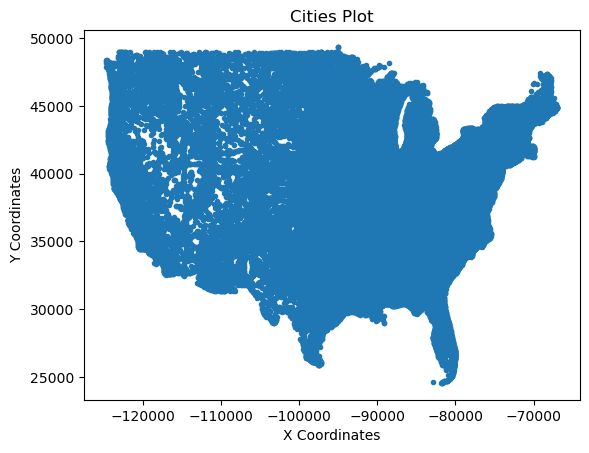

In [30]:
# Load the data
with open("cities.csv") as datafile:
    data = np.loadtxt(datafile, delimiter=" ")[:,1:]  # chop off city indices

N = len(data)  # number of cities in datafile

# Prepare 2D array so (CITIES[i,0],CITIES[i,1]) gives (x,y) coordinates for city i
CITIES = np.zeros((N,2))
CITIES[:,0] = -data[:,1]
CITIES[:,1] = data[:,0]

plt.plot(CITIES[:,0],CITIES[:,1],'.')
plt.title("Cities Plot")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.show()

In [31]:
# Function to calculate the Euclidean distance between two cities
#@jit(nopython=True)
def euclidean_distance(city1, city2):
    return np.linalg.norm(city1 - city2)

# Function to find the nearest neighbor that hasn't been visited yet
#@jit(nopython=True)
def find_nearest_neighbor(current_city, cities, visited):
    min_distance = 1e12
    nearest_city = None
    for i in range(len(cities)):
        if not visited[i]:
            distance = euclidean_distance(current_city, cities[i])
            if distance < min_distance:
                min_distance = distance
                nearest_city = i
    return nearest_city, min_distance



In [32]:
# Greedy algorithm to solve TSP
#@jit(nopython=True)
def greedy_tsp(cities):
    N = len(cities)
    visited = np.zeros(N, dtype=np.bool_)
    tour = np.empty(N + 1)
    tour[0] = 0  # Start from the first city
    visited[0] = True
    total_distance = 0.0
    current_city = cities[0]

    for k in range(1, N):
        next_city, distance = find_nearest_neighbor(current_city, cities, visited)
        tour[k] = next_city
        visited[next_city] = True
        total_distance += distance
        current_city = cities[next_city]

    # Return to the starting city to complete the tour
    total_distance += euclidean_distance(current_city, cities[0])
    tour[N] = 0
    
    return tour, total_distance

In [1]:
# Get the tour and the total tour length
tour, tour_length = greedy_tsp(CITIES)

# Print the results
print(f"Tour: {tour}")
print(f"Total tour length: {tour_length}")

# Plot the tour
tour_coords = CITIES[tour]
plt.plot(tour_coords[:,0], tour_coords[:,1], 'o-')
plt.title("Tour Plot")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.show()

NameError: name 'greedy_tsp' is not defined